In [77]:
import wget
from matplotlib import pyplot as plt


In [3]:
url = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'
wget.download(url)

100% [............................................................................] 391501 / 391501

'jamb_exam_results.csv'

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column 'JAMB_Score').

In [1]:
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('jamb_exam_results.csv')

In [3]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### Data preparation

Make the names lowercase:

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


Fill missing values with zeros.

In [6]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
student_id                        0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [33]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
student_id                        int64
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [4]:
df_fillna = df.fillna(0)

In [8]:
df_fillna.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
student_id                      0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

Remove the student_id column:

In [5]:
del df_fillna['student_id']

In [10]:
df_fillna.head().T

,0,1,2,3,4
jamb_score,192,207,182,210,199
study_hours_per_week,22,14,29,29,12
attendance_rate,78,88,87,99,98
teacher_quality,4,4,2,2,3
distance_to_school,12.4,2.7,9.6,2.6,8.8
school_type,Public,Public,Public,Public,Public
school_location,Urban,Rural,Rural,Urban,Urban
extra_tutorials,Yes,No,Yes,No,No
access_to_learning_materials,Yes,Yes,Yes,Yes,Yes
parent_involvement,High,High,High,Medium,Medium


#### Split the data

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_full_train, df_test = train_test_split(df_fillna, test_size = 0.2, random_state = 1)

In [17]:
len(df_full_train), len(df_test)

(4000, 1000)

In [8]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [19]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_val.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,204,20,93,2,18.6,Public,Rural,Yes,Yes,Medium,High,16,Female,Low,Secondary,1
1,147,15,56,2,6.7,Public,Urban,No,Yes,Medium,Medium,17,Female,Medium,Secondary,1
2,199,20,73,3,12.8,Public,Urban,No,Yes,Medium,Medium,16,Female,Low,0,2
3,134,7,73,2,3.6,Public,Urban,Yes,No,Low,Medium,15,Male,Medium,Primary,1
4,222,26,83,3,6.2,Private,Urban,No,No,High,Low,19,Male,High,Tertiary,3


In [10]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [23]:
y_train

array([145, 231, 161, ..., 216, 234, 103], dtype=int64)

In [11]:
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test["jamb_score"]

Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
train_dicts = df_train.to_dict(orient='records')

In [27]:
train_dicts[0]

{'study_hours_per_week': 20,
 'attendance_rate': 72,
 'teacher_quality': 3,
 'distance_to_school': 4.4,
 'school_type': 'Public',
 'school_location': 'Urban',
 'extra_tutorials': 'No',
 'access_to_learning_materials': 'Yes',
 'parent_involvement': 'Medium',
 'it_knowledge': 'Low',
 'age': 21,
 'gender': 'Female',
 'socioeconomic_status': 'Low',
 'parent_education_level': 0,
 'assignments_completed': 3}

In [14]:
dv = DictVectorizer(sparse=True)

In [15]:
X_train = dv.fit_transform(train_dicts)

In [30]:
X_train

<3000x29 sparse matrix of type '<class 'numpy.float64'>'
	with 45000 stored elements in Compressed Sparse Row format>

In [16]:
feature_names = dv.get_feature_names_out()

### Question 1

Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier(max_depth=1)

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [20]:
val_dicts = df_val.to_dict(orient='records')

In [21]:
X_val = dv.transform(val_dicts)

In [22]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [23]:
y_pred.shape

(1000,)

In [24]:
y_val.shape

(1000,)

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
from sklearn.tree import export_text

In [27]:
print(export_text(dt, feature_names=feature_names))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



### Question 2

Train a random forest regressor with these parameters:

n_estimators=10

random_state=1

n_jobs=-1 (optional - to make training faster)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [30]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [31]:
y_pred = rf.predict(X_val)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
RMSE = np.sqrt(mean_squared_error(y_val, y_pred))

In [34]:
RMSE

42.13724207871227

### Question 3

Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

In [36]:
for estim in range(10, 201, 10):
    print(f"estim = {estim}")
    rf = RandomForestRegressor(n_estimators=estim, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE = {RMSE:.3f}")
    print("------------------------")

estim = 10
RMSE = 42.137
------------------------
estim = 20
RMSE = 41.461
------------------------
estim = 30
RMSE = 41.106
------------------------
estim = 40
RMSE = 40.917
------------------------
estim = 50
RMSE = 40.852
------------------------
estim = 60
RMSE = 40.784
------------------------
estim = 70
RMSE = 40.677
------------------------
estim = 80
RMSE = 40.539
------------------------
estim = 90
RMSE = 40.504
------------------------
estim = 100
RMSE = 40.517
------------------------
estim = 110
RMSE = 40.593
------------------------
estim = 120
RMSE = 40.625
------------------------
estim = 130
RMSE = 40.651
------------------------
estim = 140
RMSE = 40.595
------------------------
estim = 150
RMSE = 40.597
------------------------
estim = 160
RMSE = 40.604
------------------------
estim = 170
RMSE = 40.628
------------------------
estim = 180
RMSE = 40.641
------------------------
estim = 190
RMSE = 40.631
------------------------
estim = 200
RMSE = 40.601
--------------

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

### Question 4

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]

For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)

calculate the mean RMSE

Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [40]:
for md in [10, 15, 20, 25]:
    print(f"max_depth = {md}")
    
    
    rmse_curr_md = []
    
    for estim in range(10, 201, 10):

        
        rf = RandomForestRegressor(n_estimators=estim, max_depth = md, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_curr_md.append(RMSE)
        
    print(f"min RMSE = {min(rmse_curr_md):.3f}")
    print("------------------------")
    

------------------------
max_depth = 10
min RMSE = 40.174
------------------------
------------------------
max_depth = 15
min RMSE = 40.497
------------------------
------------------------
max_depth = 20
min RMSE = 40.493
------------------------
------------------------
max_depth = 25
min RMSE = 40.513
------------------------


### Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:

    n_estimators=10,
    
    max_depth=20,
    
    random_state=1,
    
    n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature (among these 4)?

    study_hours_per_week
    
    attendance_rate
    
    distance_to_school
    
    teacher_quality

In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [43]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [46]:
len(rf.feature_importances_)

29

In [47]:
len(feature_names)

29

In [50]:
l_features = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']

In [51]:


for last, first in zip(feature_names, rf.feature_importances_):
    if last in l_features : 
        print (last + " : ", first, "\n")

attendance_rate :  0.14972902978467467 

distance_to_school :  0.13648580486323686 

study_hours_per_week :  0.2483536119939654 

teacher_quality :  0.08268222263880151 



### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    
    Create DMatrix for train and validation
    
    Create a watchlist
    
    Train a model with these parameters for 100 rounds:

        xgb_params = {
                'eta': 0.3, 
                'max_depth': 6,
                'min_child_weight': 1,
                
                'objective': 'reg:squarederror',
                'nthread': 8,
                
                'seed': 1,
                'verbosity': 1,
            }
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    Both give equal value

In [53]:
import xgboost as xgb

In [56]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = list(feature_names))

In [57]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names = list(feature_names))

In [99]:
xgb_params_1 = {
        'eta': 0.3, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [107]:
%%capture output_1

model_1 = xgb.train(xgb_params_1, dtrain, evals = watchlist, num_boost_round=100)

s = output_2.stdout

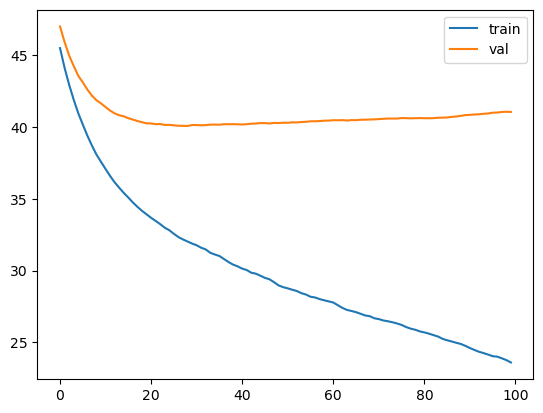

In [84]:
df_score = parse_xgb_output(output_2)

plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [63]:
y_pred_1 = model_1.predict(dval)

RMSE for model_2 :

In [67]:
np.sqrt(mean_squared_error(y_val, y_pred_1))

43.418817345871766

In [96]:
xgb_params_2 = {
        'eta': 0.1, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }



UsageError: Line magic function `%%capture` not found.


In [112]:
%%capture output_2

model_2 = xgb.train(xgb_params_2, dtrain, evals = watchlist, num_boost_round=100)
s = output_2.stdout

In [98]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [81]:
df_score = parse_xgb_output(output_2)

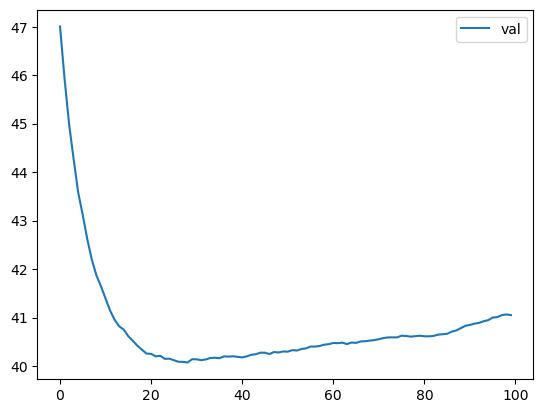

In [87]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [66]:
y_pred_2 = model_2.predict(dval)

RMSE for model_2

In [68]:
np.sqrt(mean_squared_error(y_val, y_pred_2))

41.05034017683498

In [ ]:
scores = {}

In [119]:
key = 'eta=%s' % (xgb_params_2['eta'])
scores[key] = parse_xgb_output(output_2)
key

'eta=0.1'

In [118]:
scores['eta=0.3']


,num_iter,train_rmse,val_rmse
0,0,42.69384,44.89114
1,1,39.83326,43.07010
2,2,37.94542,42.00332
3,3,36.56125,41.46452
4,4,35.44252,40.88896
...,...,...,...
95,95,11.95568,43.37919
96,96,11.76819,43.39410
97,97,11.58218,43.40203
98,98,11.53812,43.40245


In [120]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.3'])

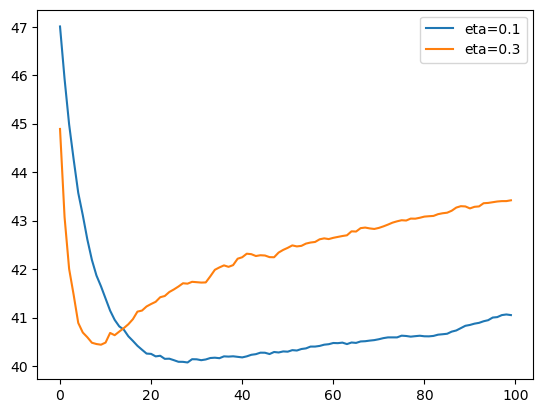

In [121]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.legend()